<a href="https://colab.research.google.com/github/Dheepdata/DHEEPDATA/blob/main/MeltingPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Melting Point of chemical molecules using Graph Neural Network

##### Made use of BradleyMeltingPointDataset for the model.

In [1]:
!pip install "numpy<2.0"


In [2]:
!pip install rdkit-pypi

In [3]:
!pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [4]:
# Install PyTorch Geometric dependencies and core
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 kB 8.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.4 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.6/776.6 kB 13.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.8/215.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00


In [5]:
!nvidia-smi

Wed Jul 16 07:15:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
## Importing necessary libraries
import pandas as pd
import rdkit
import scipy
from rdkit import Chem
from rdkit.Chem import Draw
import torch
import matplotlib.pyplot as plt
import torch_geometric

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cpu.so: undefined symbol: _ZN5t

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [8]:
df = pd.read_csv("/content/gdrive/MyDrive/MeltingPointDataset.csv")
df = df[['name','smiles','mpC']]
df

,name,smiles,mpC
0,"2-(2,4-dinitrobenzyl)pyridine",c1ccnc(c1)Cc2ccc(cc2[N+](=O)[O-])[N+](=O)[O-],92.0
1,2-(1-piperidinyl)aniline,c1ccc(c(c1)N)N2CCCCC2,46.0
2,2-(1-piperazinyl)pyrimidine,c1cnc(nc1)N2CCNCC2,33.0
3,2-(1-piperazinyl)phenol,c1ccc(c(c1)N2CCNCC2)O,125.0
4,2-(1-cyclohexenyl)ethylamine,C1CCC(=CC1)CCN,-55.0
...,...,...,...
28640,xanthene,c1ccc2c(c1)Cc3ccccc3O2,100.5
28641,xanthene,c1ccc2c(c1)Cc3ccccc3O2,100.5
28642,xanthene,c1ccc2c(c1)Cc3ccccc3O2,101.5
28643,Xanthene,C1C2=CC=CC=C2OC3=CC=CC=C31,101.0


In [9]:
df

,name,smiles,mpC
0,"2-(2,4-dinitrobenzyl)pyridine",c1ccnc(c1)Cc2ccc(cc2[N+](=O)[O-])[N+](=O)[O-],92.0
1,2-(1-piperidinyl)aniline,c1ccc(c(c1)N)N2CCCCC2,46.0
2,2-(1-piperazinyl)pyrimidine,c1cnc(nc1)N2CCNCC2,33.0
3,2-(1-piperazinyl)phenol,c1ccc(c(c1)N2CCNCC2)O,125.0
4,2-(1-cyclohexenyl)ethylamine,C1CCC(=CC1)CCN,-55.0
...,...,...,...
28640,xanthene,c1ccc2c(c1)Cc3ccccc3O2,100.5
28641,xanthene,c1ccc2c(c1)Cc3ccccc3O2,100.5
28642,xanthene,c1ccc2c(c1)Cc3ccccc3O2,101.5
28643,Xanthene,C1C2=CC=CC=C2OC3=CC=CC=C31,101.0


In [10]:
df['name'] = df['name'].str.lower()
df['name'].duplicated().sum()/len(df)

0.16201780415430267

In [11]:
df['smiles'].duplicated().sum()/len(df)

0.16222726479315763

In [12]:
df_new= df.drop_duplicates(subset=['name','smiles'], keep='first', inplace=False, ignore_index=False)

In [13]:
df_new.shape

(26244, 3)

In [14]:
df_new

,name,smiles,mpC
0,"2-(2,4-dinitrobenzyl)pyridine",c1ccnc(c1)Cc2ccc(cc2[N+](=O)[O-])[N+](=O)[O-],92.0
1,2-(1-piperidinyl)aniline,c1ccc(c(c1)N)N2CCCCC2,46.0
2,2-(1-piperazinyl)pyrimidine,c1cnc(nc1)N2CCNCC2,33.0
3,2-(1-piperazinyl)phenol,c1ccc(c(c1)N2CCNCC2)O,125.0
4,2-(1-cyclohexenyl)ethylamine,C1CCC(=CC1)CCN,-55.0
...,...,...,...
28634,veratraldehyde,COc1cc(ccc1OC)C=O,43.0
28635,warfarin,CC(=O)CC(C\1=C(/O)c2ccccc2OC/1=O)c3ccccc3,161.0
28640,xanthene,c1ccc2c(c1)Cc3ccccc3O2,100.5
28643,xanthene,C1C2=CC=CC=C2OC3=CC=CC=C31,101.0


In [15]:
def kekule_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles, sanitize=False)
        Chem.SanitizeMol(mol)  # Run checks
        Chem.Kekulize(mol, clearAromaticFlags=True)
        return Chem.MolToSmiles(mol, kekuleSmiles=True)
    except Exception as e:
        return None  # or log: f"{smiles} --> {e}"


In [16]:
df_new["kekule"] = df_new["smiles"].apply(kekule_smiles)
df_new['kekule']

[07:15:47] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11 12 13 15 16 17 18 19 22 23 24
[07:15:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 7 8 10 11 12 13 15 16 17 19
[07:15:47] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 7 8 9 11 12 13 15 16 17 18
[07:15:47] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11 12 13 15 16 17 18 19 21 22 23
[07:15:47] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 11 12 13 15 16 17 18 19 20 21 22
[07:15:48] Explicit valence for atom # 20 C, 5, is greater than permitted
[07:15:48] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[07:15:48] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 23
[07:15:48] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[07:15:48] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[07:15:48] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[07:15:48] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[07:15:48] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 

,kekule
0,O=[N+]([O-])C1=CC=C(CC2=CC=CC=N2)C([N+](=O)[O-...
1,NC1=CC=CC=C1N1CCCCC1
2,C1=CN=C(N2CCNCC2)N=C1
3,OC1=CC=CC=C1N1CCNCC1
4,NCCC1=CCCCC1
...,...
28634,COC1=CC=C(C=O)C=C1OC
28635,CC(=O)CC(C1=CC=CC=C1)C1=C(O)C2=CC=CC=C2OC1=O
28640,C1=CC=C2OC3=CC=CC=C3CC2=C1
28643,C1=CC=C2OC3=CC=CC=C3CC2=C1


In [17]:
null_count = df_new['kekule'].isna().sum()
print(f"Number of null values in the kekule column: {null_count}")

Number of null values in the kekule column: 279


In [18]:
df_new = df_new.dropna(subset=['kekule'])
df_new

,name,smiles,mpC,kekule
0,"2-(2,4-dinitrobenzyl)pyridine",c1ccnc(c1)Cc2ccc(cc2[N+](=O)[O-])[N+](=O)[O-],92.0,O=[N+]([O-])C1=CC=C(CC2=CC=CC=N2)C([N+](=O)[O-...
1,2-(1-piperidinyl)aniline,c1ccc(c(c1)N)N2CCCCC2,46.0,NC1=CC=CC=C1N1CCCCC1
2,2-(1-piperazinyl)pyrimidine,c1cnc(nc1)N2CCNCC2,33.0,C1=CN=C(N2CCNCC2)N=C1
3,2-(1-piperazinyl)phenol,c1ccc(c(c1)N2CCNCC2)O,125.0,OC1=CC=CC=C1N1CCNCC1
4,2-(1-cyclohexenyl)ethylamine,C1CCC(=CC1)CCN,-55.0,NCCC1=CCCCC1
...,...,...,...,...
28634,veratraldehyde,COc1cc(ccc1OC)C=O,43.0,COC1=CC=C(C=O)C=C1OC
28635,warfarin,CC(=O)CC(C\1=C(/O)c2ccccc2OC/1=O)c3ccccc3,161.0,CC(=O)CC(C1=CC=CC=C1)C1=C(O)C2=CC=CC=C2OC1=O
28640,xanthene,c1ccc2c(c1)Cc3ccccc3O2,100.5,C1=CC=C2OC3=CC=CC=C3CC2=C1
28643,xanthene,C1C2=CC=CC=C2OC3=CC=CC=C31,101.0,C1=CC=C2OC3=CC=CC=C3CC2=C1


In [19]:
df_new["kekule"][0]

'O=[N+]([O-])C1=CC=C(CC2=CC=CC=N2)C([N+](=O)[O-])=C1'

In [20]:
df_new["Mol"] = df_new["kekule"].apply(Chem.MolFromSmiles)
df_new['Mol']

/tmp/ipython-input-20-2178509535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Mol"] = df_new["kekule"].apply(Chem.MolFromSmiles)


,Mol
0,<rdkit.Chem.rdchem.Mol object at 0x7b3d912b3e60>
1,<rdkit.Chem.rdchem.Mol object at 0x7b3d912b3ae0>
2,<rdkit.Chem.rdchem.Mol object at 0x7b3d912b3ed0>
3,<rdkit.Chem.rdchem.Mol object at 0x7b3d912b3f40>
4,<rdkit.Chem.rdchem.Mol object at 0x7b3d912b3b50>
...,...
28634,<rdkit.Chem.rdchem.Mol object at 0x7b3d90f9ff40>
28635,<rdkit.Chem.rdchem.Mol object at 0x7b3d90fa0040>
28640,<rdkit.Chem.rdchem.Mol object at 0x7b3d90fa00b0>
28643,<rdkit.Chem.rdchem.Mol object at 0x7b3d90fa0120>


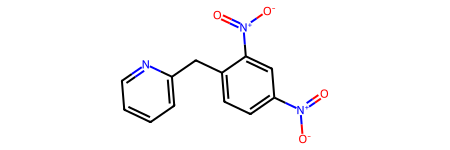

In [21]:
df_new["Mol"][0]

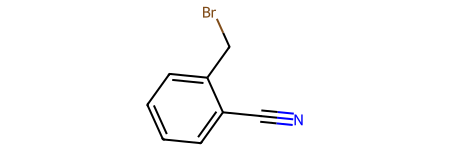

In [22]:
df_new["Mol"][1000]

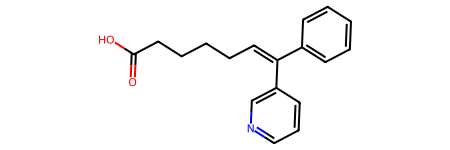

In [23]:
df_new["Mol"][10000]

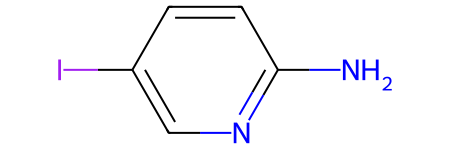

In [24]:
df_new["Mol"][2000]

/tmp/ipython-input-25-1608723861.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["idx_mol"] = df_new["Mol"].apply(lambda x: get_idx(x))


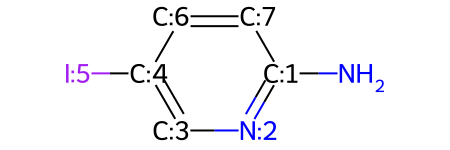

In [25]:
def get_idx(molecule):
    for atom in molecule.GetAtoms():
        #print (atom)
        idx_atom = atom.GetIdx()
        #print(idx_atom)
        atom.SetAtomMapNum(idx_atom)
    return (molecule)

df_new["idx_mol"] = df_new["Mol"].apply(lambda x: get_idx(x))
df_new["idx_mol"][2000]

In [26]:
def find_edge(molecule):
    edges = []
    for bond in molecule.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edges.append([i,j])
        edges.append([j,i])
    return edges

df_new['edge'] = df_new['idx_mol'].apply(lambda x:find_edge(x))
df_new["edge"][2000]

/tmp/ipython-input-26-993251735.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['edge'] = df_new['idx_mol'].apply(lambda x:find_edge(x))


[[0, 1],
 [1, 0],
 [1, 2],
 [2, 1],
 [2, 3],
 [3, 2],
 [3, 4],
 [4, 3],
 [4, 5],
 [5, 4],
 [4, 6],
 [6, 4],
 [6, 7],
 [7, 6],
 [7, 1],
 [1, 7]]

In [27]:
from rdkit.Chem import rdmolops

In [28]:
def adj_matrix(molecule):
    x = rdkit.Chem.rdmolops.GetAdjacencyMatrix(molecule)

    return torch.tensor(x, dtype = torch.long)# check with google tensor?

df_new["adj_matrix"] = df_new["idx_mol"].apply(lambda x: adj_matrix(x))
df_new["adj_matrix"][2000]

/tmp/ipython-input-28-646405076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["adj_matrix"] = df_new["idx_mol"].apply(lambda x: adj_matrix(x))


tensor([[0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 1],
        [0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 1, 0]])